In [2]:
import pandas as pd
df = pd.read_csv('/content/fraudtransactions.csv')

In [3]:
df.shape

(1000, 7)

In [4]:
df.head()

,Unnamed: 0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Fraud
0,0,1.021519,-0.548166,-2.079610,2.988799,-2.282637,0
1,1,0.210297,0.378811,-1.558116,1.737750,-2.083806,0
2,2,0.312219,0.266673,-0.873507,2.422799,-2.373239,0
3,3,0.613577,-0.487993,-1.824985,2.346751,-2.172025,0
4,4,-0.062001,-0.837709,-1.414938,1.124668,-1.826684,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Feature_1   1000 non-null   float64
 2   Feature_2   1000 non-null   float64
 3   Feature_3   1000 non-null   float64
 4   Feature_4   1000 non-null   float64
 5   Feature_5   1000 non-null   float64
 6   Fraud       1000 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 54.8 KB


In [4]:
df.isnull().sum()

,0
Unnamed: 0,0
Feature_1,0
Feature_2,0
Feature_3,0
Feature_4,0
Feature_5,0
Fraud,0


In [5]:
df.duplicated().sum()

0

In [6]:
df['Fraud'].value_counts().reset_index()     # highly imbalanced dataset

,Fraud,count
0,0,990
1,1,10


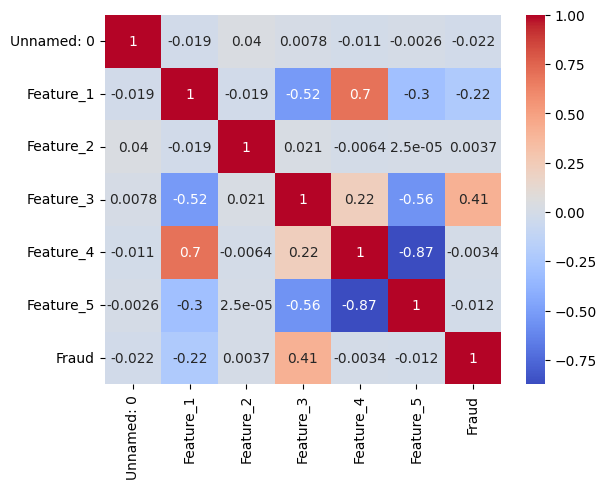

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt                                       # Only Feature 3 and Fraud are having corelations
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

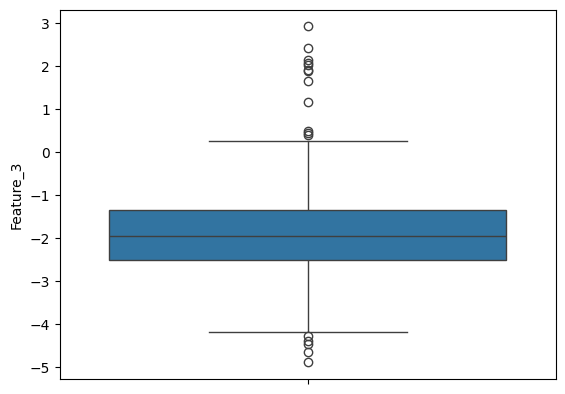

In [17]:
sns.boxplot(df['Feature_3'])
plt.show()

In [24]:
x = df[['Feature_3', 'Feature_2']].values
y = df['Fraud'].values

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify= y)    # using stratified cross validation

In [26]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [27]:
y_predict = classifier.predict(x_test)

In [29]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

acc = accuracy_score(y_test, y_predict)
cm = confusion_matrix(y_test, y_predict)
roc = roc_auc_score(y_test, y_predict)

print("Accuracy score is:\n", acc)
print("Confusion Matrix: \n", cm)
print("ROC-AUC Curve: \n", roc)

Accuracy score is:
 0.995
Confusion Matrix: 
 [[198   0]
 [  1   1]]
ROC-AUC Curve: 
 0.75


This data is misleading

#**Handling Imbalanced data by SMOTE**

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [47]:
smote = SMOTE()

x_smote, y_smote = smote.fit_resample(df[['Feature_3', 'Feature_2']], df['Fraud'])

In [48]:
y_smote.value_counts()

,count
Fraud,
0,990
1,990


In [49]:
len(y_smote), len(x_smote)

(1980, 1980)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 42)

In [52]:
y_train.value_counts()

,count
Fraud,
1,797
0,787


In [53]:
y_test.value_counts()

,count
Fraud,
0,203
1,193


In [54]:
classifier = make_pipeline(StandardScaler(), LogisticRegression(max_iter = 1000))
classifier.fit(x_train, y_train)

#Pipeline: Ensures that preprocessing (scaling) and model training are performed in a streamlined way, reducing the risk of data leakage.

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [55]:
y_pred = classifier.predict(x_test)

In [56]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

print("Accuracy score is:\n", acc)
print("Confusion Matrix: \n", cm)
print("ROC-AUC Curve: \n", roc)

Accuracy score is:
 0.9974747474747475
Confusion Matrix: 
 [[202   1]
 [  0 193]]
ROC-AUC Curve: 
 0.9975369458128079


### **Without SMOTE:**
- **Accuracy score**: 0.995
  - The model correctly predicted 99.5% of the instances.
- **Confusion Matrix**:
  - **True Positives (TP)**: 198
  - **False Positives (FP)**: 0
  - **True Negatives (TN)**: 1
  - **False Negatives (FN)**: 1
- **ROC-AUC Curve**: 0.75
  - The ROC-AUC score suggests that the model is not very effective at distinguishing between the classes. This can happen due to the imbalance in the dataset, where the model may struggle to classify the minority class correctly.

### **With SMOTE:**
- **Accuracy score**: 0.9975
  - The model's accuracy improved to 99.75%.
- **Confusion Matrix**:
  - **True Positives (TP)**: 202
  - **False Positives (FP)**: 1
  - **True Negatives (TN)**: 193
  - **False Negatives (FN)**: 0
- **ROC-AUC Curve**: 0.9975
  - With SMOTE, the ROC-AUC score significantly improved, showing that the model can now distinguish between the positive and negative classes very effectively.

### Summary of Improvements with SMOTE:
- **Accuracy** and **ROC-AUC** scores both improved with SMOTE, indicating that it helped balance the dataset, allowing the model to better classify the minority class.
- The confusion matrix shows an improvement in both positive and negative predictions, with fewer misclassifications overall.

SMOTE seems to have greatly benefited your model by addressing the imbalance issue, which is reflected in the improved ROC-AUC score and the more balanced confusion matrix.

#***Decision tree***

In [96]:
x = df[['Feature_3', 'Feature_2']]
y = df['Fraud']

In [97]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [98]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 42, stratify = y_smote)

In [101]:
from sklearn.tree import DecisionTreeClassifier

classifier = make_pipeline(StandardScaler(), DecisionTreeClassifier())
classifier.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [102]:
y_pred = classifier.predict(x_test)

In [103]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

print("Accuracy score is:\n", acc)
print("Confusion Matrix: \n", cm)
print("ROC-AUC Curve: \n", roc)

Accuracy score is:
 1.0
Confusion Matrix: 
 [[198   0]
 [  0 198]]
ROC-AUC Curve: 
 1.0


Here im getting perfect fit with 100% accuracy

#***XG Boost***

In [88]:
x = df[['Feature_3', 'Feature_2']]
y = df['Fraud']

In [89]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [90]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 42, stratify = y_smote)

In [92]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'xgbclassifier__n_estimators': [50, 100, 200],           # Since you are using a Pipeline that includes StandardScaler() and XGBClassifier()
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],        # parameters you want to tune should be prefixed with the name of the classifier in the pipeline
    'xgbclassifier__max_depth': [3, 5, 7],
    'xgbclassifier__subsample': [0.8, 0.9, 1.0],
    'xgbclassifier__colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the XGBoost Classifier
xgb_classifier = make_pipeline(StandardScaler(), XGBClassifier(random_state=42))

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',  # Change scoring to a classification metric
    verbose=1,
    n_jobs=-1
)

In [93]:
# Fit GridSearchCV
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,...
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'xgbclassifier__colsample_bytree': [0.8, 0.9, 1.0],
                         'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],
                         'xgbclassifier__max_depth': [3, 5, 7],
                         'xgbclassifier__n_estimators': [50, 100, 200],
                         'xgbclassifier__subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy', verbose=1)

In [94]:
# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score (Accuracy): {best_score:.4f}")

# Fit the best model
best_model = grid_search.best_estimator_

# Predict on the test set with the best model
y_pred_best = best_model.predict(x_test)


Best Parameters: {'xgbclassifier__colsample_bytree': 0.8, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__subsample': 1.0}
Best Score (Accuracy): 0.9994


In [95]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

acc = accuracy_score(y_test, y_pred_best)
cm = confusion_matrix(y_test, y_pred_best)
roc = roc_auc_score(y_test, y_pred_best)

print("Accuracy score is:\n", acc)
print("Confusion Matrix: \n", cm)
print("ROC-AUC Curve: \n", roc)

Accuracy score is:
 1.0
Confusion Matrix: 
 [[198   0]
 [  0 198]]
ROC-AUC Curve: 
 1.0


#***Random Forest***

In [104]:
x = df[['Feature_3', 'Feature_2']]
y = df['Fraud']

In [105]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [76]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 42, stratify = y_smote)

In [107]:
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter tuning

classifier = make_pipeline(StandardScaler(), RandomForestClassifier())
grid_values = {
              'randomforestclassifier__n_estimators':[50, 80,  100],
              'randomforestclassifier__max_depth':[3, 5, 7]
              }
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier.fit(x_train, y_train)          # have patience takes 10mins to run

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [3, 5, 7],
                         'randomforestclassifier__n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [79]:
y_pred = classifier.predict(x_test)

In [108]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

print("Accuracy score is:\n", acc)
print("Confusion Matrix: \n", cm)
print("ROC-AUC Curve: \n", roc)

Accuracy score is:
 1.0
Confusion Matrix: 
 [[198   0]
 [  0 198]]
ROC-AUC Curve: 
 1.0


#***Artificial Neural Network***

In [62]:
x = df[['Feature_3', 'Feature_2']]
y = df['Fraud']

In [63]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [64]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)

In [66]:
print(x_smote.shape)
print(y_smote.shape)


(1980, 2)
(1980,)


In [67]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 42, stratify = y_smote)

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import HeUniform, GlorotUniform

In [69]:
# Initialize the ANN
classifier = Sequential()  # This initializes the sequential model for adding layers

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer=HeUniform(), activation='relu', input_dim=2))  # input_dim is required for the first layer

# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer=HeUniform(), activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer=GlorotUniform(), activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Preprocessing with StandardScaler
scaler = StandardScaler()

# Scale the training data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Fit the ANN to the training set
classifier.fit(x_train_scaled, y_train, batch_size=10, epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7007 - loss: 0.6635
Epoch 2/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9730 - loss: 0.2493
Epoch 3/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9939 - loss: 0.1043
Epoch 4/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9974 - loss: 0.0511
Epoch 5/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9952 - loss: 0.0341
Epoch 6/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9936 - loss: 0.0271
Epoch 7/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9991 - loss: 0.0164
Epoch 8/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9989 - loss: 0.0120
Epoch 9/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9976 - loss: 0.0123
Epoch 10/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9991 - loss: 0.0095
Epoch 11/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9987 - loss: 0.0074
Epoch 12/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [70]:

# Predicting the test set results
y_pred = classifier.predict(x_test_scaled)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [71]:
y_test.values

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,

In [72]:
y_npred = []

for i in y_pred:
  if i < 0.5:
    y_npred.append(0)
  else:
    y_npred.append(1)

print(y_npred)

[0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 

In [73]:
acc = accuracy_score(y_test, y_npred)
cm = confusion_matrix(y_test, y_npred)
roc = roc_auc_score(y_test, y_npred)

print("Accuracy score is:\n", acc)
print("Confusion Matrix: \n", cm)
print("ROC-AUC Curve: \n", roc)

Accuracy score is:
 1.0
Confusion Matrix: 
 [[198   0]
 [  0 198]]
ROC-AUC Curve: 
 1.0


#***SUMMARY***

### Insights:
- **Without SMOTE**, the logistic regression model struggles with imbalanced data, showing poor performance on the minority class (as seen in the low ROC-AUC score).
- **With SMOTE**, all models perform exceptionally well, indicating that oversampling the minority class has significantly improved their ability to classify both classes correctly.
- **Perfect scores** in models with Decision Tree, Random Forest, XGBoost, and ANN suggest potential overfitting, as real-world datasets rarely produce such ideal results.





###**Potential Overfitting**:
   - The perfect accuracy and ROC-AUC scores across models suggest that the models may have memorized the training data rather than learning generalizable patterns. This could occur if:
     - The dataset is small or too simple for the models (1000 rows)
     - SMOTE has generated synthetic samples that are very similar to real ones, making it easier for models to classify.
   
   